Using camera: puA1600-60um
Image captured and saved as basler_capture.png


(np.float64(152.16515553651928),
 np.float64(25.637624838326634),
 (np.float64(3315.4855372322645), np.float64(2025.8733173029077)))

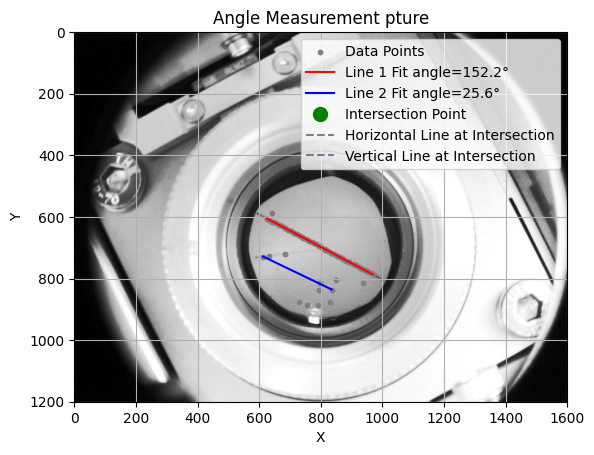

In [171]:
# Grab image from a Basler pua1600 camera using pypylon
try:
    from pypylon import pylon
except ImportError:
    print("pypylon library not found. Please install it with 'pip install pypylon'.")
    raise

# Create an instant camera object with the camera device found first
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

# Print camera info
print("Using camera:", camera.GetDeviceInfo().GetModelName())

# Start grabbing one image
camera.StartGrabbingMax(1)
converter = pylon.ImageFormatConverter()
converter.OutputPixelFormat = pylon.PixelType_RGB8packed
converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned

while camera.IsGrabbing():
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
    if grabResult.GrabSucceeded():
        # Access the image data
        image = converter.Convert(grabResult)
        img = image.GetArray()
        from PIL import Image
        img_pil = Image.fromarray(img)
        img_pil.save("basler_capture.png")
        print("Image captured and saved as basler_capture.png")
    else:
        print("Error: ", grabResult.ErrorCode, grabResult.ErrorDescription)
    grabResult.Release()
camera.Close()




import sys
sys.path.append('C:\\Users\\deotech\\Documents\\Bane\\DOE_stage_lifetest')
import angle_extraction as aex

aex.Analyze_Image("basler_capture.png",plot_level=1,verbose_level=0)

Using camera: puA1600-60um
Image captured and saved as basler_capture_20251008-091639.png


(np.float64(334.3955704474271),
 np.float64(26.08377828860763),
 (np.float64(-11573.861769463248), np.float64(-5232.1927270422275)))

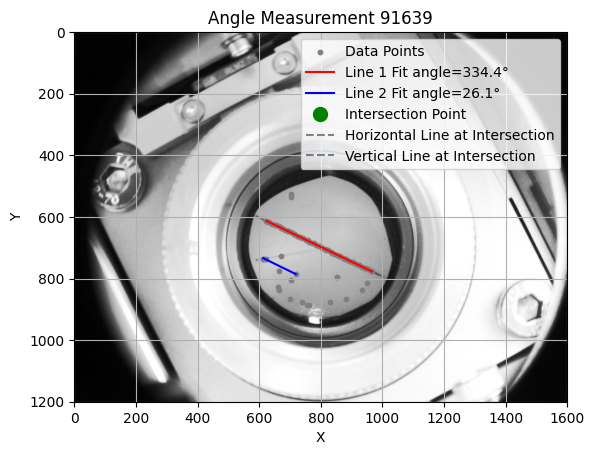

In [180]:
import time
# Grab image from a Basler pua1600 camera using pypylon
try:
    from pypylon import pylon
except ImportError:
    print("pypylon library not found. Please install it with 'pip install pypylon'.")
    raise

# Create an instant camera object with the camera device found first
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

# Print camera info
print("Using camera:", camera.GetDeviceInfo().GetModelName())

# Start grabbing one image
camera.StartGrabbingMax(1)
converter = pylon.ImageFormatConverter()
converter.OutputPixelFormat = pylon.PixelType_RGB8packed
converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned

while camera.IsGrabbing():
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
    if grabResult.GrabSucceeded():
        # Access the image data
        image = converter.Convert(grabResult)
        img = image.GetArray()
        from PIL import Image
        img_pil = Image.fromarray(img)
        filename = "basler_capture_" + time.strftime("%Y%m%d-%H%M%S") + ".png"
        img_pil.save(filename)
        print("Image captured and saved as", filename)
    else:
        print("Error: ", grabResult.ErrorCode, grabResult.ErrorDescription)
    grabResult.Release()
camera.Close()


import sys
sys.path.append('C:\\Users\\deotech\\Documents\\Bane\\DOE_stage_lifetest')
import angle_extraction as aex

aex.Analyze_Image(filename,plot_level=1,verbose_level=0)